# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

#from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
field = 'AKARI-SEP'

In [3]:
#Open small file containing only id ra dec field photo_z photo_zerr
desi_photoz = Table.read('../../dmu0/dmu0_DESI/data/dr8_red.fits')
desi_photoz = desi_photoz[desi_photoz['field'] == field.ljust(18)]

In [4]:
desi_photoz.write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z.fits'.format(field), overwrite=True)

In [5]:
desi_photoz

ID,RA,DEC,field,photo_z,photo_zerr
int64,float64,float64,bytes18,float32,float32
8000065028000002,68.68765749089056,-53.62084079272064,AKARI-SEP,0.672848,0.054838672
8000065028000015,68.73411996076267,-53.624606602053944,AKARI-SEP,0.37463886,0.11564237
8000065028000023,68.75523549347935,-53.622798698428014,AKARI-SEP,0.30666983,0.01959213
8000065028000027,69.00214435502667,-53.62465973526172,AKARI-SEP,0.6022465,0.06487623
8000065028000038,68.97311349143162,-53.62214907950856,AKARI-SEP,0.602056,0.086470105
8000065028000044,68.70548781351525,-53.62376194103833,AKARI-SEP,0.66091305,0.043726444
8000065028000046,69.06048596374681,-53.6238715577854,AKARI-SEP,0.41513547,0.11224443
8000065028000053,68.99031660133129,-53.62108682119807,AKARI-SEP,0.6735051,0.050466564
8000065028000057,68.71982349220329,-53.6231808499974,AKARI-SEP,0.5338285,0.11618458


In [6]:
ml = Table.read('../../dmu1/dmu1_ml_AKARI-SEP/data/master_catalogue_akari-sep_20180221.fits')['help_id', 'ra', 'dec']

In [7]:
ml

help_id,field,ra,dec,hp_idx,f_ap_vista_j,ferr_ap_vista_j,m_ap_vista_j,merr_ap_vista_j,f_vista_j,ferr_vista_j,m_vista_j,merr_vista_j,flag_vista_j,f_ap_vista_h,ferr_ap_vista_h,m_ap_vista_h,merr_ap_vista_h,f_vista_h,ferr_vista_h,m_vista_h,merr_vista_h,flag_vista_h,f_ap_vista_ks,ferr_ap_vista_ks,m_ap_vista_ks,merr_ap_vista_ks,f_vista_ks,ferr_vista_ks,m_vista_ks,merr_vista_ks,flag_vista_ks,f_ap_irac_i1,ferr_ap_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,f_irac_i1,ferr_irac_i1,m_irac_i1,merr_irac_i1,flag_irac_i1,f_ap_irac_i2,ferr_ap_irac_i2,m_ap_irac_i2,merr_ap_irac_i2,f_irac_i2,ferr_irac_i2,m_irac_i2,merr_irac_i2,flag_irac_i2,f_ap_decam_g,ferr_ap_decam_g,m_ap_decam_g,merr_ap_decam_g,f_decam_g,ferr_decam_g,m_decam_g,merr_decam_g,flag_decam_g,f_ap_decam_r,ferr_ap_decam_r,m_ap_decam_r,merr_ap_decam_r,f_decam_r,ferr_decam_r,m_decam_r,merr_decam_r,flag_decam_r,f_ap_decam_i,ferr_ap_decam_i,m_ap_decam_i,merr_ap_decam_i,f_decam_i,ferr_decam_i,m_decam_i,merr_decam_i,flag_decam_i,f_ap_decam_z,ferr_ap_decam_z,m_ap_decam_z,merr_ap_decam_z,f_decam_z,ferr_decam_z,m_decam_z,merr_decam_z,flag_decam_z,f_ap_decam_y,ferr_ap_decam_y,m_ap_decam_y,merr_ap_decam_y,f_decam_y,ferr_decam_y,m_decam_y,merr_decam_y,flag_decam_y,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bytes20,bool,bool,int64,int64,int64,float64,bool,int64,float64
HELP_J045604.934-523248.576,AKARI-SEP,74.02055866983201,-52.54682677370467,556822318,nan,nan,nan,nan,nan,nan,nan,nan,False,53230.438,26.593967,12.0845995,0.00054243463,224331.55,69.16964,10.522774,0.00033477228,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.8999999761581421,vhs_stellarity,False,False,0,7,0,0.008190429988860453,False,-99,nan
HELP_J045007.657-541157.093,AKARI-SEP,72.53190414760664,-54.199192440097306,556113126,nan,nan,nan,nan,nan,nan,nan,nan,False,44477.03,22.38924,12.27966,0.00054654747,38960.164,28.035303,12.423448,0.00078128383,False,51937.1,27.813547,12.111305,0.0005814374,187818.88,49.037533,10.7156515,0.0002834743,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.9938650131225586,vhs_stellarity,False,False,0,3,2,0.010203937154655476,False,-99,nan
HELP_J045605.388-523251.372,AKARI-SEP,74.02245151469,-52.547603220925865,556822318,nan,nan,nan,nan,nan,nan,nan,nan,False,50571.637,25.958805,12.140232,0.00055731664,114800.695,47.8169,11.250138,0.0004522319,False,58817.65,31.368359,11.976231,0.00057903986,54215.617,34.679256,12.064689,0.00069449586,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,n

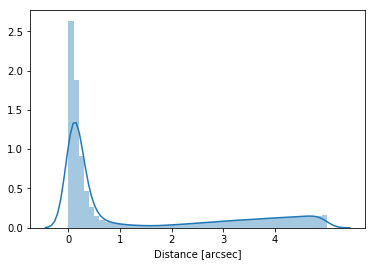

In [8]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['RA']*u.deg, desi_photoz['DEC']*u.deg)
)

In [9]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['RA'].name = 'desi_ra'
desi_photoz['DEC'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [10]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz[has_help & has_z].write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z_withhelp_id.fits'.format(field), overwrite=True)

In [11]:
photoz[has_help & has_z]

help_id,field,ra,dec,hp_idx,f_ap_vista_j,ferr_ap_vista_j,m_ap_vista_j,merr_ap_vista_j,f_vista_j,ferr_vista_j,m_vista_j,merr_vista_j,flag_vista_j,f_ap_vista_h,ferr_ap_vista_h,m_ap_vista_h,merr_ap_vista_h,f_vista_h,ferr_vista_h,m_vista_h,merr_vista_h,flag_vista_h,f_ap_vista_ks,ferr_ap_vista_ks,m_ap_vista_ks,merr_ap_vista_ks,f_vista_ks,ferr_vista_ks,m_vista_ks,merr_vista_ks,flag_vista_ks,f_ap_irac_i1,ferr_ap_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,f_irac_i1,ferr_irac_i1,m_irac_i1,merr_irac_i1,flag_irac_i1,f_ap_irac_i2,ferr_ap_irac_i2,m_ap_irac_i2,merr_ap_irac_i2,f_irac_i2,ferr_irac_i2,m_irac_i2,merr_irac_i2,flag_irac_i2,f_ap_decam_g,ferr_ap_decam_g,m_ap_decam_g,merr_ap_decam_g,f_decam_g,ferr_decam_g,m_decam_g,merr_decam_g,flag_decam_g,f_ap_decam_r,ferr_ap_decam_r,m_ap_decam_r,merr_ap_decam_r,f_decam_r,ferr_decam_r,m_decam_r,merr_decam_r,flag_decam_r,f_ap_decam_i,ferr_ap_decam_i,m_ap_decam_i,merr_ap_decam_i,f_decam_i,ferr_decam_i,m_decam_i,merr_decam_i,flag_decam_i,f_ap_decam_z,ferr_ap_decam_z,m_ap_decam_z,merr_ap_decam_z,f_decam_z,ferr_decam_z,m_decam_z,merr_decam_z,flag_decam_z,f_ap_decam_y,ferr_ap_decam_y,m_ap_decam_y,merr_ap_decam_y,f_decam_y,ferr_decam_y,m_decam_y,merr_decam_y,flag_decam_y,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec,field_1,ID,field_2,photo_z,photo_zerr
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bytes20,bool,bool,int64,int64,int64,float64,bool,int64,float64,bytes18,int64,bytes18,float32,float32
HELP_J045207.147-534137.340,N/A,73.02977995809098,-53.69370541823,556127112,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,1.6053544851433974,0.12686112431220734,23.386072635650635,0.08579894155263901,1.3794446674729741,0.12733547655608196,23.550739288330078,0.10022347420454025,False,2.36216298706442,0.16050327049069937,22.96672534942627,0.07377315312623978,2.1222963652433,0.1688913222397708,23.082984924316406,0.08640236407518387,False,2.06392806798989,0.2641193705245049,23.113263607025146,0.13894087076187134,1.840168683553941,0.28986984471252536,23.237855911254883,0.1710289865732193,False,3.0985890269664904,0.5526651614537764,22.67209005355835,0.1936521977186203,3.2438764180379533,0.6151053302972472,22.622339248657227,0.20587779581546783,False,2.6778227682206457,1.9265342175138678,22.83054542541504,0.781122624874115,1.8132612815319191,2.0969537467001973,23.253849029541016,1.2556042671203613,False,0.37076112627983093,des_stellarity,False,False,0,7,1,0.006777592800887175,False,-99,nan,AKARI-SEP,8000064181003226,AKARI-SEP,0.77624714,0.05639983
HELP_J044424.701-531342.741,N/A,71.10292129853136,-53.22853903360171,556223040,33.051723,3.4430563,20.102015,0.11310305,42.689026,8.886106,19.82421,0.22600578,False,39.399864,4.819285,19.911263,0.13280432,49.115692,11.889633,19.67195,0.26282853,False,44.258194,5.755989,19.785015,0.14120516,56.44575,13.739197,19.520922,0.26427397,False,40.54345,1.017354,19.880196,0.027244305,44.155,1.3531326,19.787552,0.03327245,False,30.615738,0.8646675,20.185143,0.0306639